In [ ]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = load_dataset("lukebarousse/data_jobs")['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [16]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US.dropna(subset='salary_rate', inplace=True)

In [17]:
top_roles = df_US['job_title_short'].value_counts().head(3).index.tolist()
new_role = []
for role in top_roles:
    new_role.append("Senior " + role)
for role in new_role:
    top_roles.append(role)
df_US_top3_roles = df_US[df_US['job_title_short'].isin(top_roles)].copy()

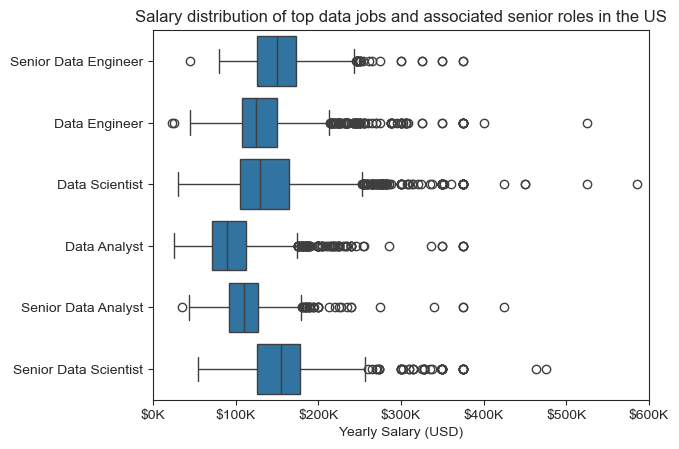

In [ ]:
from matplotlib.ticker import FuncFormatter
sns.boxplot(df_US_top3_roles, x='salary_year_avg', y='job_title_short')
sns.set_style('ticks')
plt.xlim(0,600000)
plt.xlabel("Yearly Salary (USD)")
plt.ylabel('')
plt.title("Salary distribution of top data jobs and associated senior roles in the US")
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))